# The Sparks Foundation

# Task-1:- Predict the scores of the students based on their study hours using Supervised Learning.

# Author - Himanshu Shekhar

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Fetching the required dataset

In [3]:
df = pd.read_csv('student_scores - student_scores.csv')

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
df.shape #shows no.of rows and columns

(25, 2)

In [9]:
df.info # show information of dataset

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [10]:
df.describe() #

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###  Missing Data evulation

In [11]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Visualization

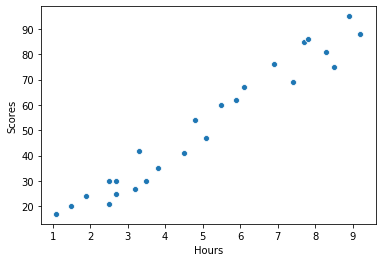

In [13]:
sns.scatterplot(x=df['Hours'], y=df['Scores']);#scatterplot 

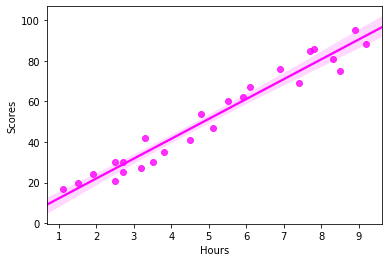

In [14]:
sns.regplot(x=df['Hours'], y=df['Scores'],color='magenta'); # regression plot for clear understanding

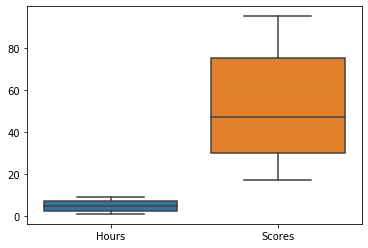

In [15]:
sns.boxplot(data = df) #boxplot representation

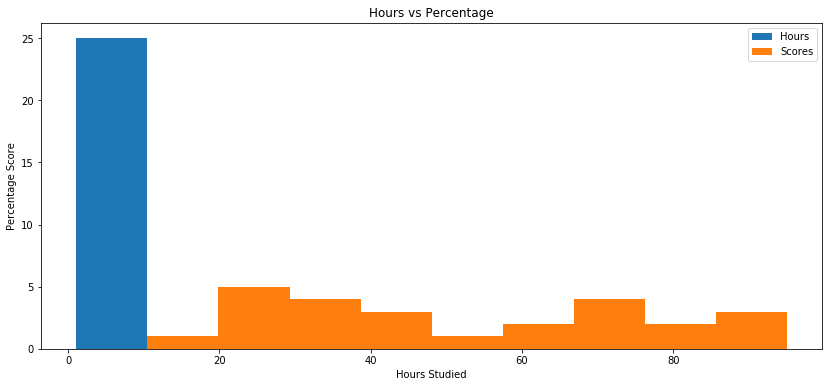

In [16]:
df.plot(kind='hist', figsize=(14,6))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing the data for Modelling

In [17]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [18]:
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Spliting the dataset into training and testing

In [19]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.37, random_state=10)

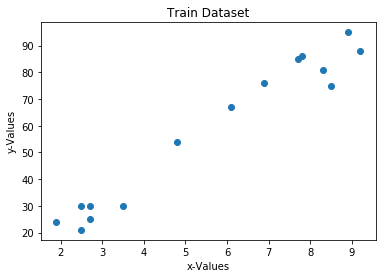

In [20]:
#plot for train dataset
plt.scatter(x_train,y_train)
plt.title('Train Dataset')
plt.xlabel('x-Values')
plt.ylabel('y-Values')
plt.show()

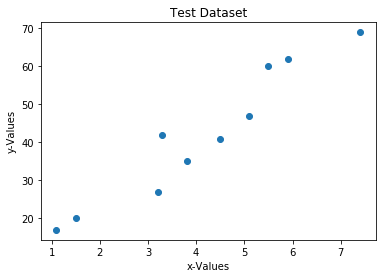

In [21]:
#plot for test dataset
plt.scatter(x_test,y_test)
plt.title('Test Dataset')
plt.xlabel('x-Values')
plt.ylabel('y-Values')
plt.show()

### Training the algorithm

In [22]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression() 
model.fit(x_train, y_train)

LinearRegression()

### Checking the accuracy of the Model

In [24]:
print('Accuracy of model is: {} %' .format(round(model.score(x_test, y_test), 2) * 100))

Accuracy of model is: 90.0 %


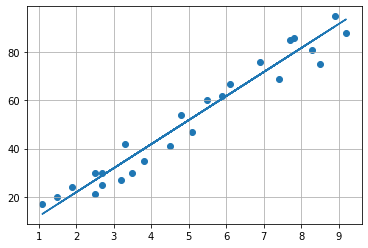

In [23]:
# Plotting the regression line
line = model.coef_*x + model.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.grid()
plt.show()

In [25]:
# making predictions
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores
print(y_pred)

[[1.5]
 [5.1]
 [3.3]
 [3.2]
 [4.5]
 [7.4]
 [1.1]
 [5.5]
 [5.9]
 [3.8]]
[16.85051175 52.80615997 34.82833586 33.82956785 46.81355193 75.77782411
 12.85543973 56.80123199 60.79630402 39.82217589]


In [26]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.850512
1,47,52.806160
2,42,34.828336
3,27,33.829568
4,41,46.813552
5,69,75.777824
6,17,12.855440
7,60,56.801232
8,62,60.796304
9,35,39.822176


# Testing the model to predict the percentage of student if he studies for 9.25 hours

In [28]:
hours = 9.25
pred = model.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.25503222137982


# A student who studies 9.25 hours is estimated to score 94.25503222137982

In [32]:
# evulating performace of model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.891745640636845
